In [25]:
import cv2
import os

image_folder = 'process'
video_name = 'process.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images = sorted(images, key=lambda x: int(x[3:-4]) )
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0x7634706d, 10, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.write(cv2.imread("img.png"))

cv2.destroyAllWindows()
video.release()

In [32]:
import numpy as np
import matplotlib.pyplot as plt

class Rule:
    def __init__(self, base, neighbour, dir):
        self.base = base
        self.neighbour = tuple(tuple(tuple(int(m*255) for m in k) for k in l) for l in neighbour)
        self.dir = dir
    
    def __repr__(self) -> str:
        return f"legal(({self.dir[0]}, {self.dir[1]}), {self.base}, {self.neighbour})."
    
    def __hash__(self):
        return hash(self.__repr__())
    
    def __eq__(self, other):
        return (isinstance(other, Rule) and
                (self.base == other.base) and 
                (self.neighbour == other.neighbour) and 
                (self.dir == other.dir))

img = plt.imread("samples/flowers.png")

rules = set()
patterns = {}

width = img.shape[0]
height = img.shape[1]

n = 2

parts = []

for j in range(0, height, n):
    for i in range(0, width, n):
        win = img[i:i+n, j:j+n]
        if win.shape[0] != n or win.shape[1] != n: continue
        
        pat = tuple(tuple(tuple(int(m*255) for m in k) for k in l) for l in win)
        if pat not in patterns: patterns[pat] = 1
        else: patterns[pat] += 1

        if i - n >= 0:
            nbr = img[i-n:i, j:j+n]
            if nbr.shape[0] != n or nbr.shape[1] != n: continue
            rules.add(Rule(pat, nbr, (0, -n)))
        if i + n < width:
            nbr = img[i+n:i+2*n, j:j+n]
            if nbr.shape[0] != n or nbr.shape[1] != n: continue
            rules.add(Rule(pat, nbr, (0, n)))
        if j - n >= 0:
            nbr = img[i:i+n, j-n:j]
            if nbr.shape[0] != n or nbr.shape[1] != n: continue
            rules.add(Rule(pat, nbr, (-n, 0)))
        if j + n < height:
            nbr = img[i:i+n, j+n:j+2*n]
            if nbr.shape[0] != n or nbr.shape[1] != n: continue
            rules.add(Rule(pat, nbr, (n, 0)))
        
output = "#program rules.\n"
output += "\n".join(map(lambda rule: rule.__repr__(), rules))
output += f"\n\noffset({n}, 0)."
output += f"\noffset(-{n}, 0)."
output += f"\noffset(0, {n})."
output += f"\noffset(0, -{n})."
output += "\n\n" + "\n".join([f"pattern({s})." for s in patterns.keys()])
output += "\n\n" + "\n".join([f"pattern_weight({k}, {v})." for (k, v) in patterns.items()])

print(output)



#program rules.
legal((0, -2), (((191, 232, 242, 255), (0, 170, 0, 255)), ((191, 232, 242, 255), (191, 232, 242, 255))), (((191, 232, 242, 255), (255, 242, 0, 255)), ((191, 232, 242, 255), (0, 170, 0, 255)))).
legal((-2, 0), (((191, 232, 242, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (191, 232, 242, 255))), (((255, 242, 0, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (191, 232, 242, 255)))).
legal((0, -2), (((191, 232, 242, 255), (191, 232, 242, 255)), ((0, 170, 0, 255), (191, 232, 242, 255))), (((191, 232, 242, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (191, 232, 242, 255)))).
legal((2, 0), (((0, 170, 0, 255), (0, 170, 0, 255)), ((191, 232, 242, 255), (0, 170, 0, 255))), (((191, 232, 242, 255), (191, 232, 242, 255)), ((0, 170, 0, 255), (191, 232, 242, 255)))).
legal((0, -2), (((191, 232, 242, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (191, 232, 242, 255))), (((0, 170, 0, 255), (0, 170, 0, 255)), ((191, 232, 242, 255), (0, 170, 0, 255)))).
legal((-2

In [42]:
[p for p in list(patterns.keys())]

(((191, 232, 242, 255), (191, 232, 242, 255)),
 ((191, 232, 242, 255), (191, 232, 242, 255)))

c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\matplotlib\cbook\__init__.py:743: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

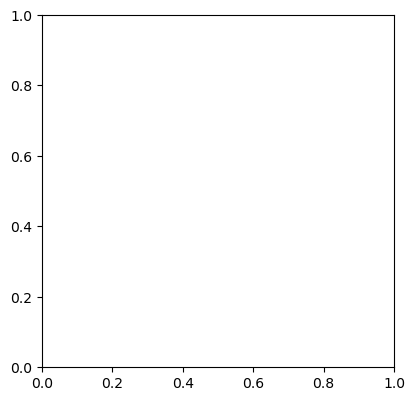

In [37]:


fig = plt.figure(figsize=(10, 7)) 

for p in enumerate(patterns.keys()):
    fig.add_subplot(1, 2, i+1) 
    plt.imshow(list(p)) 

In [36]:
patterns.keys()

dict_keys([(((191, 232, 242, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (191, 232, 242, 255))), (((191, 232, 242, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (255, 242, 0, 255))), (((255, 242, 0, 255), (0, 170, 0, 255)), ((191, 232, 242, 255), (255, 242, 0, 255))), (((191, 232, 242, 255), (0, 170, 0, 255)), ((191, 232, 242, 255), (0, 170, 0, 255))), (((185, 122, 87, 255), (185, 122, 87, 255)), ((185, 122, 87, 255), (185, 122, 87, 255))), (((255, 242, 0, 255), (191, 232, 242, 255)), ((191, 232, 242, 255), (191, 232, 242, 255))), (((191, 232, 242, 255), (191, 232, 242, 255)), ((0, 170, 0, 255), (191, 232, 242, 255))), (((0, 170, 0, 255), (191, 232, 242, 255)), ((0, 170, 0, 255), (0, 170, 0, 255))), (((191, 232, 242, 255), (255, 242, 0, 255)), ((255, 242, 0, 255), (0, 170, 0, 255))), (((191, 232, 242, 255), (255, 242, 0, 255)), ((191, 232, 242, 255), (0, 170, 0, 255))), (((191, 232, 242, 255), (0, 170, 0, 255)), ((191, 232, 242, 255), (191, 232, 242, 255))), (((191, 232, 

In [70]:
x = np.array([[1, 2, 10], [3, 4, 20]])

tuple(tuple(j for j in i) for i in x)

((1, 2, 10), (3, 4, 20))

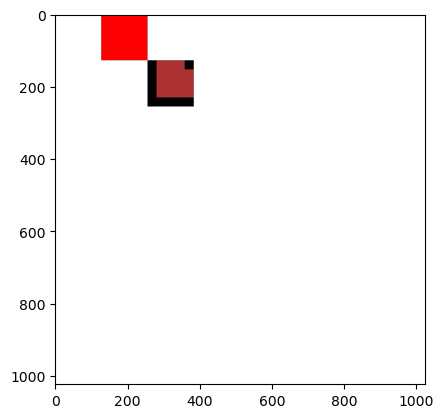

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

sc = 128

grid = np.zeros((8*sc, 8*sc, 4))

data = np.array([
    [
        [1, 0, 0, 1.],
        [1, 0, 0, 1.]
    ],
    [
        [1, 0, 0, 1.],
        [1, 0, 0, 1.]
    ]
])

x, y = 1, 0
n = 2

grid[y*sc:(y+1)*sc, x*sc:(x+1)*sc, :] = cv2.resize(data, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)#data.repeat(sc, axis=0).repeat(sc, axis=1)

x, y = 2, 1
tile = plt.imread("simple_tiles/edge.png")
# tile = np.rot90(tile, rot.number)
grid[y*sc:(y+1)*sc, x*sc:(x+1)*sc, :] = tile

plt.imshow(grid)

In [26]:
grid.astype("uint8")[17, 129, :]

array([1, 0, 0, 1], dtype=uint8)

In [29]:
grid[:-0, :-0, :].shape

(0, 0, 4)

In [16]:
import numpy as np

def mutate(x):
    x[0:2, 1:3] = [[20, 20], [20, 20]]

rot = np.array([[0.7, 2, 3, 4], [5, 6, 7, 8]])
print(rot)
# mutate(rot)
rot.astype("uint8")


[[0.7 2.  3.  4. ]
 [5.  6.  7.  8. ]]


array([[0, 2, 3, 4],
       [5, 6, 7, 8]], dtype=uint8)

In [23]:
x = np.array([[1, 1], [2, 2]])
y = np.array([[3, 3], [4, 4]])

print(x)
print(y)
print()
print(np.rot90(x, axes=(1, 0), k=1))
print(np.rot90(y, axes=(1, 0), k=1))
print()
print(np.rot90(x, axes=(1, 0), k=2))
print(np.rot90(y, axes=(1, 0), k=2))

[[1 1]
 [2 2]]
[[3 3]
 [4 4]]

[[2 1]
 [2 1]]
[[4 3]
 [4 3]]

[[2 2]
 [1 1]]
[[4 4]
 [3 3]]
